In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
pronostico = pd.read_csv('../assets/archivos/wc_forecasts.csv')
pronostico.head(10)

,forecast_timestamp,team,group,spi,global_o,global_d,sim_wins,sim_ties,sim_losses,sim_goal_diff,...,group_1,group_2,group_3,group_4,make_round_of_16,make_quarters,make_semis,make_final,win_league,timestamp
0,2022-12-18 17:56:03 UTC,Argentina,C,89.64860,2.83610,0.39397,2.0,0.0,1.0,3.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2022-12-18 17:56:44 UTC
1,2022-12-18 17:56:03 UTC,France,D,88.30043,2.96765,0.54381,2.0,0.0,1.0,3.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,2022-12-18 17:56:44 UTC
2,2022-12-18 17:56:03 UTC,Morocco,F,73.16416,1.74313,0.53433,2.0,1.0,0.0,3.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2022-12-18 17:56:44 UTC
3,2022-12-18 17:56:03 UTC,Croatia,F,78.82038,2.20264,0.60290,1.0,2.0,0.0,3.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2022-12-18 17:56:44 UTC
4,2022-12-18 17:56:03 UTC,England,B,87.82131,2.71564,0.44261,2.0,1.0,0.0,7.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-18 17:56:44 UTC
5,2022-12-18 17:56:03 UTC,Netherlands,A,83.97533,2.52711,0.54940,2.0,1.0,0.0,4.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-18 17:56:44 UTC
6,2022-12-18 17:56:03 UTC,Portugal,H,87.02373,2.78069,0.52262,2.0,0.0,1.0,2.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-18 17:56:44 UTC
7,2022-12-18 17:56:03 UTC,Brazil,G,93.18946,3.12200,0.28266,2.0,0.0,1.0,2.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2022-12-18 17:56:44 UTC
8,2022-12-18 17:56:03 UTC,Japan,E,75.96229,2.04074,0.62372,2.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-18 17:56:44 UTC
9,2022-12-18 17:56:03 UTC,Senegal,A,74.43038,1.95825,0.63294,2.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2022-12-18 17:56:44 UTC


In [3]:
pronostico.info()

# El archivo contiene 256 filas y 22 columnas, que no presentan valores nulos.
# forecast_timestamp, team, group y timestamp son variables cualitativas.

# spi, global_o, global_d, goals_scored, goals_against, 
# make_round_of_16, make_quarters, make_semis, make_final, win_league son variables Cuantitativas Continuas. 

# sim_wins, sim_ties, sim_losses, sim_goal_diff, group_1, group_2, group_3, group_4 son variables Cuantitativas Discretas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   forecast_timestamp  256 non-null    object 
 1   team                256 non-null    object 
 2   group               256 non-null    object 
 3   spi                 256 non-null    float64
 4   global_o            256 non-null    float64
 5   global_d            256 non-null    float64
 6   sim_wins            256 non-null    float64
 7   sim_ties            256 non-null    float64
 8   sim_losses          256 non-null    float64
 9   sim_goal_diff       256 non-null    float64
 10  goals_scored        256 non-null    float64
 11  goals_against       256 non-null    float64
 12  group_1             256 non-null    float64
 13  group_2             256 non-null    float64
 14  group_3             256 non-null    float64
 15  group_4             256 non-null    float64
 16  make_rou

In [4]:
# Reemplazamos el nombre de las columnas por su traducción a Español para facilitar la lectura
pronostico.rename(columns={
    'forecast_timestamp': 'Fase',
    'team': 'Equipo',
    'group': 'Grupo',
    'spi': 'SPI',
    'global_o': 'Global_Ofensivo',
    'global_d': 'Global_Defensivo',
    'sim_wins': 'Simulaciones_Ganadas',
    'sim_ties': 'Simulaciones_Empatadas',
    'sim_losses': 'Simulaciones_Perdidas',
    'sim_goal_diff': 'Diferencia_Goles_Simulados',
    'goals_scored': 'Goles_Anotados',
    'goals_against': 'Goles_Recibidos',
    'group_1': 'Grupo_1',
    'group_2': 'Grupo_2',
    'group_3': 'Grupo_3',
    'group_4': 'Grupo_4',
    'make_round_of_16': 'Clasificar_a_Octavos',
    'make_quarters': 'Clasificar_a_Cuartos',
    'make_semis': 'Clasificar_a_Semifinales',
    'make_final': 'Clasificar_a_Final',
    'win_league': 'Ganar_Liga',
    'timestamp': 'Marca_Tiempo'
}, inplace=True)


In [5]:
# Reemplazamos los valores de forecast_timestamp para que representen las fases de cada partido y no las fechas
pronostico['Fase'] = pronostico['Fase'].replace({
    '2022-12-18 17:56:03 UTC': 'Post Final',
    '2022-12-17 16:54:45 UTC': 'Pre Final',
    '2022-12-10 21:01:29 UTC': 'Pre Semis',
    '2022-12-06 20:54:12 UTC': 'Pre Cuartos',
    '2022-12-02 21:01:10 UTC': 'Pre Octavos',
    '2022-11-28 20:59:50 UTC': 'Pre 3er partido',
    '2022-11-24 20:56:17 UTC': 'Pre 2do partido',
    '2022-11-16 16:00:55 UTC': 'Pre Inicio Copa',
})

pronostico[pronostico['Equipo'] == 'Argentina'].groupby('Fase').head()

,Fase,Equipo,Grupo,SPI,Global_Ofensivo,Global_Defensivo,Simulaciones_Ganadas,Simulaciones_Empatadas,Simulaciones_Perdidas,Diferencia_Goles_Simulados,...,Grupo_1,Grupo_2,Grupo_3,Grupo_4,Clasificar_a_Octavos,Clasificar_a_Cuartos,Clasificar_a_Semifinales,Clasificar_a_Final,Ganar_Liga,Marca_Tiempo
0,Post Final,Argentina,C,89.64860,2.83610,0.39397,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,2022-12-18 17:56:44 UTC
32,Pre Final,Argentina,C,88.85631,2.69895,0.37464,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.53027,2022-12-18 17:56:44 UTC
64,Pre Semis,Argentina,C,87.45777,2.58007,0.39356,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.64042,0.36568,2022-12-18 17:56:44 UTC
99,Pre Cuartos,Argentina,C,87.32471,2.57620,0.39880,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.57583,0.24429,0.13042,2022-12-18 17:56:44 UTC
130,Pre Octavos,Argentina,C,87.98006,2.61284,0.38151,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,0.82673,0.51560,0.24966,0.13119,2022-12-18 17:56:44 UTC
164,Pre 3er partido,Argentina,C,86.02625,2.48839,0.42171,1.57821,0.26472,1.15707,1.89454,...,0.57290,0.20115,0.22498,0.00097,0.77405,0.49381,0.29805,0.12681,0.06528,2022-12-18 17:56:44 UTC
198,Pre 2do partido,Argentina,C,86.09354,2.57779,0.46600,1.08527,0.55644,1.35829,0.54682,...,0.23508,0.30558,0.22864,0.23070,0.54066,0.31108,0.18949,0.09295,0.04724,2022-12-18 17:56:44 UTC
227,Pre Inicio Copa,Argentina,C,87.20776,2.62755,0.43170,1.83671,0.73199,0.43130,3.16936,...,0.59722,0.24273,0.11295,0.04710,0.83995,0.53091,0.32755,0.15944,0.08476,2022-12-18 17:56:44 UTC


## ELIMINACIÓN DE EQUIPOS QUE PERDIERON EN CADA ETAPA

In [6]:
#Eliminamos los equipos que perdieron antes de los 8vos de final, de los 4tos de final y la Semi Final
pronostico = pronostico.loc[(pronostico['Clasificar_a_Octavos'] != 0) & (pronostico['Clasificar_a_Cuartos'] != 0) & (pronostico['Clasificar_a_Semifinales'] != 0)]
pronostico

,Fase,Equipo,Grupo,SPI,Global_Ofensivo,Global_Defensivo,Simulaciones_Ganadas,Simulaciones_Empatadas,Simulaciones_Perdidas,Diferencia_Goles_Simulados,...,Grupo_1,Grupo_2,Grupo_3,Grupo_4,Clasificar_a_Octavos,Clasificar_a_Cuartos,Clasificar_a_Semifinales,Clasificar_a_Final,Ganar_Liga,Marca_Tiempo
0,Post Final,Argentina,C,89.64860,2.83610,0.39397,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,2022-12-18 17:56:44 UTC
1,Post Final,France,D,88.30043,2.96765,0.54381,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,2022-12-18 17:56:44 UTC
2,Post Final,Morocco,F,73.16416,1.74313,0.53433,2.00000,1.00000,0.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,2022-12-18 17:56:44 UTC
3,Post Final,Croatia,F,78.82038,2.20264,0.60290,1.00000,2.00000,0.00000,3.00000,...,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,2022-12-18 17:56:44 UTC
32,Pre Final,Argentina,C,88.85631,2.69895,0.37464,2.00000,0.00000,1.00000,3.00000,...,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.53027,2022-12-18 17:56:44 UTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Pre Inicio Copa,Saudi Arabia,C,56.86592,1.50018,0.99118,0.59721,0.79021,1.61258,-2.26444,...,0.06973,0.17476,0.29436,0.46115,0.24449,0.06913,0.02164,0.00516,0.00132,2022-12-18 17:56:44 UTC
252,Pre Inicio Copa,Australia,D,60.83178,1.59388,0.91112,0.55148,0.79247,1.65605,-2.49253,...,0.05911,0.15706,0.30240,0.48143,0.21617,0.06500,0.02062,0.00454,0.00124,2022-12-18 17:56:44 UTC
253,Pre Inicio Copa,Qatar,A,51.00223,1.57111,1.31642,0.56555,0.68681,1.74764,-2.95133,...,0.06806,0.14850,0.25634,0.52710,0.21656,0.06588,0.01840,0.00399,0.00096,2022-12-18 17:56:44 UTC
254,Pre Inicio Copa,Ghana,H,58.62702,1.43347,0.85806,0.46730,0.80877,1.72393,-2.74111,...,0.04662,0.13341,0.28475,0.53522,0.18003,0.03586,0.00945,0.00284,0.00063,2022-12-18 17:56:44 UTC


### Análisis del SPI (Soccer Power Index) de Argentina. Tomando en cuenta desde previo al inicio del torneo hasta después del encuentro final.

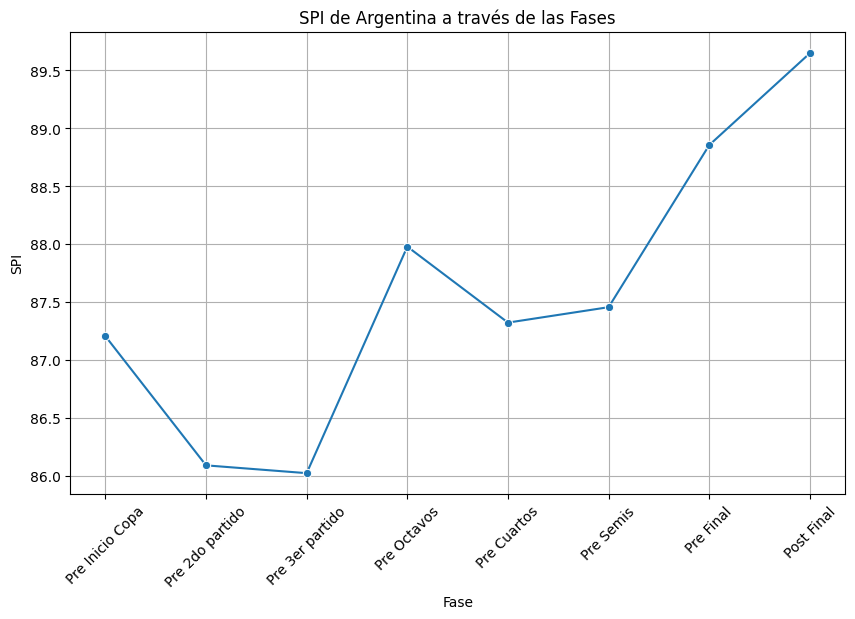

In [8]:
argentina_data = pronostico[pronostico['Equipo'] == 'Argentina']
plt.figure(figsize=(10, 6))
sns.lineplot(data=argentina_data, x='Fase', y='SPI', marker='o', sort=False)

# Invertir el orden del eje x
plt.gca().invert_xaxis()

plt.title('SPI de Argentina a través de las Fases')
plt.xlabel('Fase'), plt.ylabel('SPI')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()